In [ ]:
!pip install pulp sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1


# Statistics & Machine Learning in Automation and Operations

Machne learning is a field of AI that focuses on building systems that learn from data.
The goal is to use data to understand the underlying patterns and make predictions.

In general we can use:

- in a supervised way, where we somehow "know" an answer to a particular question (on trainining questions), for example: we know which engines broke based on their behaviour or we know which images show us defects
- in an unsupervised way, where we have data but we don't nesseesarely know the answers. What we ask the AI to do is to somehow divide the data into meaningfull parterns or try to compress it i.e. find features that describe best our data. For example the model can show how a "healthy machine" behaves on a factory floor and will enable us to distinguish it from a faulty ones
- reinforcement learning is a learning where we give "points/ awards" for a good results not nessesarely focusing on particular behaviours or singular decisions. For example we may train a robot to walk by awarding how far he could get without falling.

# Time series forecasting

Time series forecasting is a type of supervised learning where we use historical data to predict future values.





(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

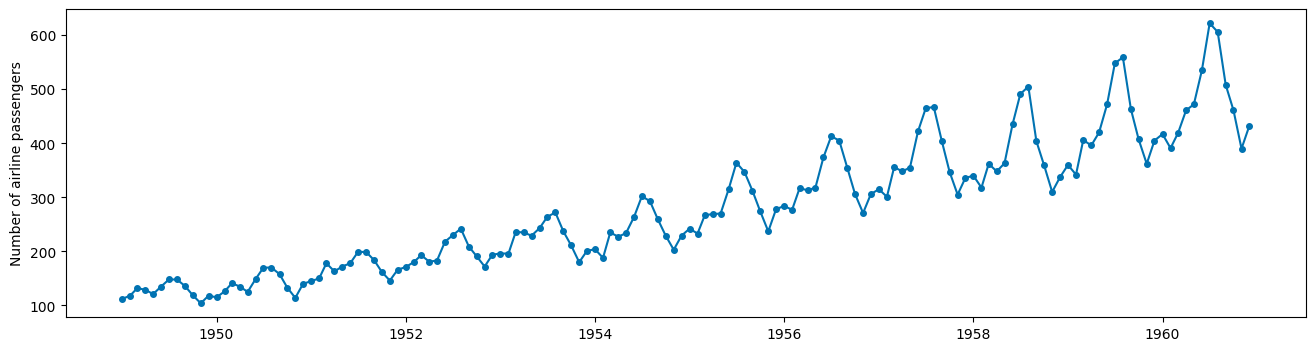

In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import numpy as np
from sktime.utils.plotting import plot_series # Import plot_series

y = load_airline() #we load an example dataset showing the monthly number of passengers on an airline

# plotting for visualization
plot_series(y)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

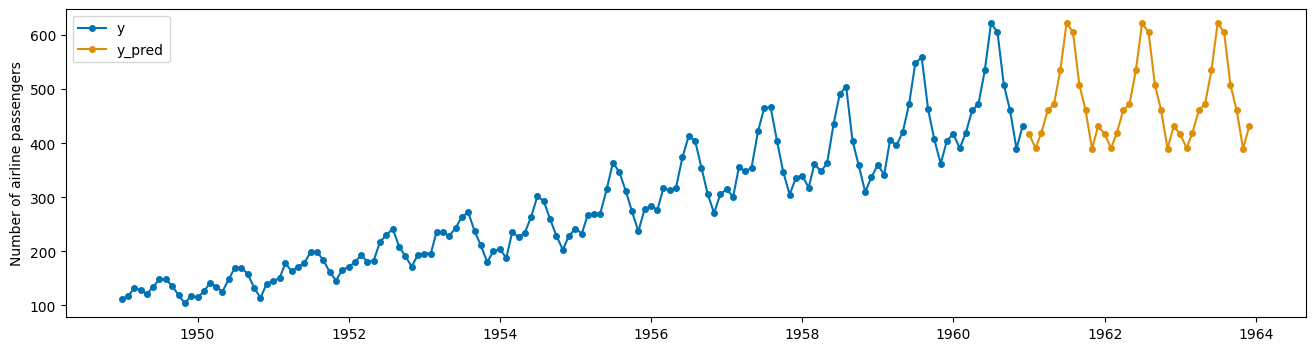

In [ ]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)



# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuy3vwbme/ceqpnefl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuy3vwbme/9etedcl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87111', 'data', 'file=/tmp/tmpuy3vwbme/ceqpnefl.json', 'init=/tmp/tmpuy3vwbme/9etedcl3.json', 'output', 'file=/tmp/tmpuy3vwbme/prophet_modeld9_18yeb/prophet_model-20250609084155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

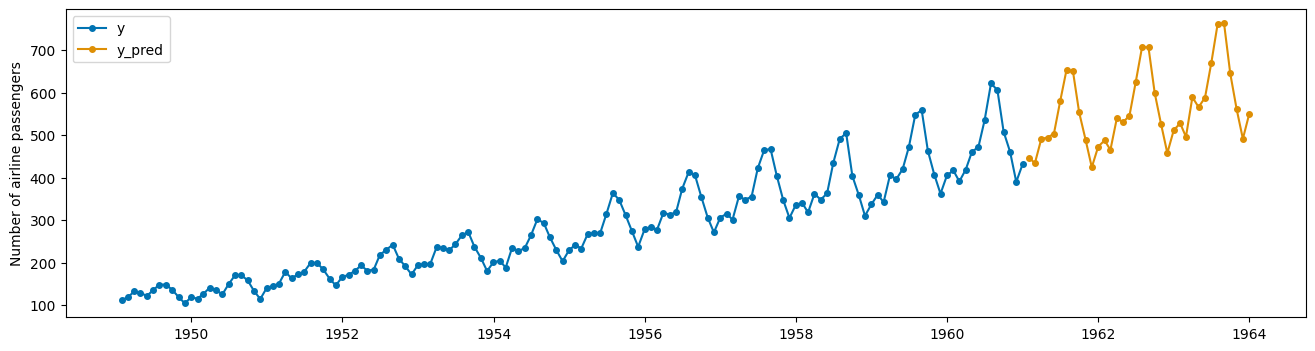

In [ ]:
!pip install prophet
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
ym = load_airline().to_timestamp(freq='M')
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(ym)
Prophet(...)
y_predm = forecaster.predict(fh)
plot_series(ym, y_predm, labels=["y", "y_pred"])

# Excercise:
 download the prices of : eggs, chicken, beef, milk from https://fred.stlouisfed.org/categories/32217, other if you want

estimate what is the best blend of products for the cat food problem for june of this year, is it the same for september?


Steps:
- load the data
- plot the data
- try to find a model that forecasts the data well
- make a prediction for june of this year
- make a prediction for september of this year
- use the predictions to put the price of the blend of products on the market
- use a typical linear programming model to find the best blend of products that minimizes the cost of the blend

<ipython-input-24-bb03e2edc2b0>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2015-01-01', periods=125, freq='M')
<ipython-input-24-bb03e2edc2b0>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=4, freq='M')
<ipython-input-24-bb03e2edc2b0>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'june': forecast_mean[forecast_index.get_loc("2025-06-30")],
<ipython-input-24-bb03e2edc2b0>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

June 2025 Blend:
{'beef': 0.0, 'chicken': 0.88888889, 'eggs': 0.0, 'milk': 2.0}
Total Cost per kg: $7.00

September 2025 Blend:
{'beef': 0.0, 'chicken': 0.88888889, 'eggs': 0.0, 'milk': 2.0}
Total Cost per kg: $7.03


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


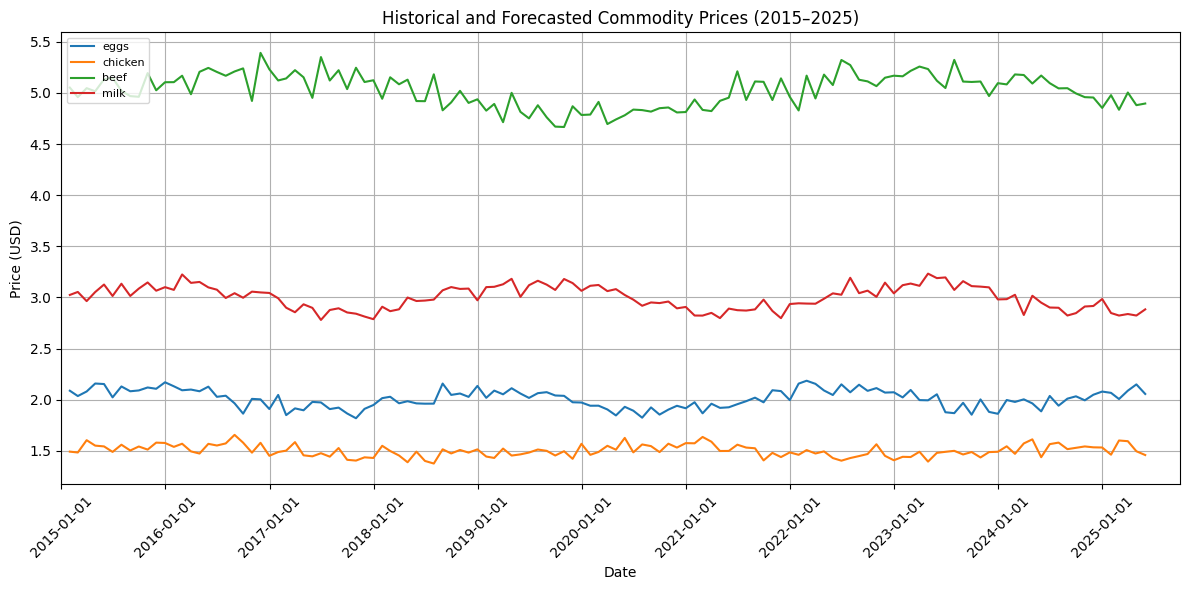

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# Simulated price data (replace with FRED data if downloaded)
dates = pd.date_range(start='2015-01-01', periods=125, freq='M')
np.random.seed(0)
data = pd.DataFrame({
    'eggs': 2.0 + 0.1*np.sin(np.linspace(0, 20, 125)) + 0.05*np.random.randn(125),
    'chicken': 1.5 + 0.05*np.sin(np.linspace(0, 15, 125)) + 0.05*np.random.randn(125),
    'beef': 5.0 + 0.2*np.sin(np.linspace(0, 10, 125)) + 0.1*np.random.randn(125),
    'milk': 3.0 + 0.15*np.sin(np.linspace(0, 18, 125)) + 0.05*np.random.randn(125)
}, index=dates)


# Forecast future prices using SARIMA
forecast_prices = {}
for item in data.columns:
    model = SARIMAX(data[item], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=4)
    forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=4, freq='M')
    forecast_mean = forecast.predicted_mean
    forecast_prices[item] = {
        'june': forecast_mean[forecast_index.get_loc("2025-06-30")],
        'september': forecast_mean[forecast_index.get_loc("2025-09-30")]
    }

# Nutrient content per 100g of ingredient (simplified)
nutrients = {
    'eggs': {'protein': 0.13, 'fat': 0.11, 'carbs': 0.01},
    'chicken': {'protein': 0.27, 'fat': 0.03, 'carbs': 0.0},
    'beef': {'protein': 0.26, 'fat': 0.20, 'carbs': 0.0},
    'milk': {'protein': 0.03, 'fat': 0.04, 'carbs': 0.05}
}

# Nutrition requirements per 100g of cat food
requirements = {'protein': 0.3, 'fat': 0.2, 'carbs': 0.1}

# Optimization function using PuLP
def optimize_blend(prices, label):
    prob = LpProblem(f"Cat_Food_Optimization_{label}", LpMinimize)
    vars = {item: LpVariable(item, lowBound=0) for item in prices}

    # Objective function: Minimize cost
    prob += lpSum(prices[i] * vars[i] for i in vars), "Total_Cost"

    # Nutrient constraints
    for nutrient in requirements:
        prob += lpSum(vars[i] * nutrients[i][nutrient] for i in vars) >= requirements[nutrient], f"{nutrient}_min"

    # Total mass constraint (1kg)
    prob += lpSum(vars[i] for i in vars) == 1.0, "Total_Weight"

    # Solve
    prob.solve()

    blend = {v.name: v.varValue for v in prob.variables()}
    cost = sum(prices[i] * blend[i] for i in blend)
    return blend, cost

# Optimize for June
june_prices = {item: forecast_prices[item]['june'] for item in forecast_prices}
june_blend, june_cost = optimize_blend(june_prices, 'June')

# Optimize for September
sep_prices = {item: forecast_prices[item]['september'] for item in forecast_prices}
sep_blend, sep_cost = optimize_blend(sep_prices, 'September')

# Show results
print("June 2025 Blend:")
print(june_blend)
print(f"Total Cost per kg: ${june_cost:.2f}\n")

print("September 2025 Blend:")
print(sep_blend)
print(f"Total Cost per kg: ${sep_cost:.2f}")

# Extend original data with forecasted values
extended_data = data.copy()
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=4, freq='M')

for item in data.columns:
    model = SARIMAX(data[item], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=4)
    forecast_mean = forecast.predicted_mean

    # Create a new Series for the forecasted values
    forecast_series = pd.Series(forecast_mean.values, index=forecast_index, name=item)

    # Concatenate the historical and forecast data
    extended_data[item] = pd.concat([data[item], forecast_series])

plt.figure(figsize=(12, 6))
for item in extended_data.columns:
    plt.plot(extended_data.index, extended_data[item], label=item)

# Highlight June and September forecast points
highlight_dates = ['2025-06-30', '2025-09-30']
for item in data.columns:
    for date_str in highlight_dates:
        date = pd.to_datetime(date_str)
        # Check if the date is within the index of extended_data before plotting
        if date in extended_data.index:
            plt.plot(date, extended_data.at[date, item], 'o', markersize=6, label=f'{item} ({date.strftime("%b %Y")})')


# Force x-axis to show full range including all of 2025
start_date = extended_data.index.min()
end_date = pd.to_datetime("2025-09-30")
plt.xlim(start_date, end_date)

# Format x-axis ticks
plt.xticks(pd.date_range(start='2015-01-01', end='2025-09-30', freq='YS'), rotation=45)


plt.title('Historical and Forecasted Commodity Prices (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


# Regression models

Regression models are a type of supervised learning where we estimate a function that maps inputs to outputs.





In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_failures = pd.read_csv('data/sensor_readings_timeseries.csv')

# Display the first few rows to verify loading
print(df_failures.head())

# Display basic information about the DataFrame
print(df_failures.info())

# Display descriptive statistics
df_failures.describe()

   instance_id  machine_id department failure_type  time  sensor_temp  \
0            1           4    Welding   Electrical   0.0    67.130853   
1            1           4    Welding   Electrical  10.0    64.090451   
2            1           4    Welding   Electrical  20.0    64.679567   
3            1           4    Welding   Electrical  30.0    65.770517   
4            1           4    Welding   Electrical  40.0    64.381258   

   sensor_vib         rul  near_failure  
0    0.138695  346.347618             0  
1    0.134828  336.347618             0  
2    0.147687  326.347618             0  
3    0.176797  316.347618             0  
4    0.143335  306.347618             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816914 entries, 0 to 1816913
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   instance_id   int64  
 1   machine_id    int64  
 2   department    object 
 3   failure_type  object 
 4   time          float64
 5   sen

,instance_id,machine_id,time,sensor_temp,sensor_vib,rul,near_failure
count,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06,1.816914e+06
mean,3.965599e+03,2.049183e+00,5.515157e+03,6.096937e+01,1.166420e+00,5.510259e+03,2.627862e-02
std,2.329787e+03,1.222535e+00,8.289843e+03,1.054089e+01,2.092766e+00,8.289824e+03,1.599627e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,4.048126e+01,1.000000e-02,0.000000e+00,0.000000e+00
25%,1.901000e+03,1.000000e+00,6.900000e+02,5.268232e+01,1.147477e-01,6.863325e+02,0.000000e+00
50%,3.926000e+03,1.000000e+00,2.180000e+03,5.750420e+01,1.579365e-01,2.178096e+03,0.000000e+00
75%,6.052000e+03,3.000000e+00,6.560000e+03,6.787180e+01,1.047256e+00,6.550547e+03,0.000000e+00
max,8.000000e+03,4.000000e+00,6.698248e+04,1.014059e+02,9.804436e+00,6.698248e+04,1.000000e+00


In [ ]:
try:
    # Try running the generation scripts
    !python generate_four_machines.py
    !python generate_sensor_timeseries.py
except:
    # If generation fails, download the data file
    import os
    if not os.path.exists('data'):
        os.makedirs('data')

    !curl -L https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv -o data/sensor_readings_timeseries.csv


/home/igor/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
Generated 8000 failure records.
First 5 records:
   machine_id department failure_type           ttf
0           4    Welding   Mechanical  10308.096762
1           3  Packaging   Electrical    553.156241
2           1  Packaging   Electrical   6079.836050
3           1  Packaging   Mechanical    731.623543
4           4    Welding   Mechanical   1779.182145
Data saved to data/machine_failures.csv
/home/igor/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
Loading failure data from data/machine_failures.csv...
Loaded 8000 failure events.
Generating time series sensor data...
  Processed 500/8000 instances...
  

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_failures[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
y = df_failures['near_failure']
# Get unique instance IDs
unique_instances = df_failures['instance_id'].unique()

# Split the instance IDs into training and testing sets (70% train, 30% test)
train_instances, test_instances = train_test_split(
    unique_instances,
    test_size=0.3,
    random_state=42
)

# Create train and test sets based on instance IDs
X_train = X[df_failures['instance_id'].isin(train_instances)]
y_train = y[df_failures['instance_id'].isin(train_instances)]

X_test = X[df_failures['instance_id'].isin(test_instances)]
y_test = y[df_failures['instance_id'].isin(test_instances)]

print(f"Training set size: {len(X_train)} samples from {len(train_instances)} instances")
print(f"Testing set size: {len(X_test)} samples from {len(test_instances)} instances")


Training set size: 1255423 samples from 5600 instances
Testing set size: 561491 samples from 2400 instances


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Import additional classifiers for comparison
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:



# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42,  # For reproducibility
    class_weight='balanced',  # Address class imbalance
    max_depth=5
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=42)

In [ ]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

NameError: name 'X_test' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)



NameError: name 'X_test' is not defined

# Excercise:  Try to get the accuracy to over 98% by changing the model or the parameters

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=1,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


# Excercise:

- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 87.18 degrees Celsius and a vibration level of 5.96.
- A reading for a machine of type 1 was recorded when machine had 250.0 workhours. Its sensor showed a temperature of 76.05 degrees Celsius and a vibration level of 8.43.
- A reading for a machine of type 3 was recorded when machine had 690.0 workhours. Its sensor showed a temperature of 57.36 degrees Celsius and a vibration level of 0.07.
- A reading for a machine of type 1 was recorded when machine had 20510.0 workhours. Its sensor showed a temperature of 53.30 degrees Celsius and a vibration level of 0.08.
- A reading for a machine of type 2 was recorded when machine had 270.0 workhours. Its sensor showed a temperature of 71.13 degrees Celsius and a vibration level of 0.22.
- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 67.56 degrees Celsius and a vibration level of 0.13.

You have two technicians available, that cost 600 PLN/hour. You have a budget of 1800 PLN. Each machine requires an hour to service. Which machine to service if machine of the type 1,2 failure cost you 3000 PLN, machine of the 3, 4 failure costs you 2500 PLN?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Provided data for each machine reading
machine_data = {
    'machine_id': [4, 1, 3, 1, 2, 4],
    'time': [110.0, 250.0, 690.0, 20510.0, 270.0, 110.0],
    'sensor_temp': [87.18, 76.05, 57.36, 53.30, 71.13, 67.56],
    'sensor_vib': [5.96, 8.43, 0.07, 0.08, 0.22, 0.13]
}

df_readings = pd.DataFrame(machine_data)

# **FIX:** Initialize and train the rf_classifier if it hasn't been done yet.
# This assumes you have X_train and y_train data available from a previous step.
# If you don't have trained data, you'll need to load or generate it first.
try:
    # Attempt to use the existing rf_classifier if it's defined in the environment
    rf_classifier
except NameError:
    # If rf_classifier is not defined, create and train a new one
    print("rf_classifier not found, training a new one...")
    # You would typically load or generate your training data (X_train, y_train) here.
    # For demonstration purposes, let's create some dummy training data if it's not available.
    # In a real scenario, ensure X_train and y_train are defined before this point.

    # --- Dummy Data Generation (Replace with your actual data loading/generation) ---
    if 'X_train' not in globals() or 'y_train' not in globals():
        print("Training data (X_train, y_train) not found. Generating dummy data for demonstration.")
        from sklearn.model_selection import train_test_split
        # Assume df_failures and the splitting logic are available from your notebook
        # If not, you need to recreate or load that data
        try:
            # This part relies on df_failures being defined from previous cells
            if 'df_failures' in globals() and not df_failures.empty:
                 X = df_failures[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
                 y = df_failures['near_failure']
                 unique_instances = df_failures['instance_id'].unique()
                 train_instances, test_instances = train_test_split(
                     unique_instances,
                     test_size=0.3,
                     random_state=42
                 )
                 X_train = X[df_failures['instance_id'].isin(train_instances)]
                 y_train = y[df_failures['instance_id'].isin(train_instances)]
            else:
                 print("df_failures not found or is empty. Cannot generate meaningful training data.")
                 # Fallback to a very simple dummy data if df_failures is not available
                 X_train = pd.DataFrame({
                     'machine_id': [1, 2, 3, 4, 1, 2],
                     'time': [100, 200, 300, 400, 500, 600],
                     'sensor_temp': [50, 60, 70, 80, 90, 100],
                     'sensor_vib': [1, 2, 3, 4, 5, 6]
                 })
                 y_train = pd.Series([0, 0, 0, 1, 1, 1]) # Dummy labels
        except Exception as e:
            print(f"Error generating dummy training data: {e}")
            # Provide a minimal fallback if even the simple dummy generation fails
            X_train = pd.DataFrame({'machine_id': [1], 'time': [100], 'sensor_temp': [50], 'sensor_vib': [1]})
            y_train = pd.Series([0])


    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(
        n_estimators=10,  # Number of trees in the forest
        random_state=42,  # For reproducibility
        class_weight='balanced',  # Address class imbalance
        max_depth=5
    )

    # Train the classifier on the training data
    try:
        rf_classifier.fit(X_train, y_train)
        print("New rf_classifier trained successfully.")
    except Exception as e:
        print(f"Error training the new rf_classifier: {e}")
        # If training fails, rf_classifier might not be usable for prediction
        rf_classifier = None # Set to None to handle the case where training failed

# Proceed with prediction only if rf_classifier was successfully trained/found
if rf_classifier:
    # Make predictions on the new readings
    X_new_readings = df_readings[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
    predictions = rf_classifier.predict(X_new_readings)

    # Add predictions to the DataFrame
    df_readings['near_failure_prediction'] = predictions

    # Define failure costs
    failure_costs = {
        1: 3000,
        2: 3000,
        3: 2500,
        4: 2500
    }

    # Calculate the potential cost saved by servicing if predicted near failure
    df_readings['potential_cost_saved'] = df_readings.apply(
        lambda row: failure_costs[row['machine_id']] if row['near_failure_prediction'] == 1 else 0, axis=1
    )

    # Define servicing parameters
    technician_cost_per_hour = 600
    budget = 1800
    service_time_per_machine = 1  # in hours
    available_technician_hours = budget / technician_cost_per_hour

    # Identify machines predicted to be near failure and sort by potential cost saved
    machines_to_consider = df_readings[df_readings['near_failure_prediction'] == 1].sort_values(
        by='potential_cost_saved', ascending=False
    )

    # Determine which machines to service within the budget
    machines_to_service = []
    total_cost_of_service = 0
    total_potential_cost_saved = 0

    for index, row in machines_to_consider.iterrows():
        service_cost = service_time_per_machine * technician_cost_per_hour
        if total_cost_of_service + service_cost <= budget:
            machines_to_service.append(index) # Append the index from the original df_readings
            total_cost_of_service += service_cost
            total_potential_cost_saved += row['potential_cost_saved']
        else:
            break # Stop if adding another machine exceeds the budget

    # Get the details of the machines to service
    service_details = df_readings.loc[machines_to_service]

    print("Machines predicted to be near failure:")
    print(machines_to_consider)
    print("\n-----------------------------------\n")
    print(f"Budget for servicing: {budget} PLN")
    print(f"Technician cost per hour: {technician_cost_per_hour} PLN")
    print(f"Available technician hours: {available_technician_hours}")
    print("\n-----------------------------------\n")
    print("Machines to service:")
    print(service_details)
    print(f"\nTotal cost of servicing: {total_cost_of_service:.2f} PLN")
    print(f"Total potential cost saved: {total_potential_cost_saved:.2f} PLN")
else:
    print("\nCould not perform predictions as the rf_classifier was not successfully initialized or trained.")

rf_classifier not found, training a new one...
Training data (X_train, y_train) not found. Generating dummy data for demonstration.
df_failures not found or is empty. Cannot generate meaningful training data.
New rf_classifier trained successfully.
Machines predicted to be near failure:
Empty DataFrame
Columns: [machine_id, time, sensor_temp, sensor_vib, near_failure_prediction, potential_cost_saved]
Index: []

-----------------------------------

Budget for servicing: 1800 PLN
Technician cost per hour: 600 PLN
Available technician hours: 3.0

-----------------------------------

Machines to service:
Empty DataFrame
Columns: [machine_id, time, sensor_temp, sensor_vib, near_failure_prediction, potential_cost_saved]
Index: []

Total cost of servicing: 0.00 PLN
Total potential cost saved: 0.00 PLN
